In [2]:
!python -m pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [3]:
import pandas as pd
print(pd.__version__)


2.1.1


In [3]:
import pandas as pd
print(pd.__version__)


2.1.1


In [5]:
!pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------- ----------- 174.1/250.0 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 3.9 MB/s eta 0:00:00


In [7]:
import os
import pandas as pd

# Path to your Excel file on the C drive
excel_file_path = r'C:\IPEDS_data.xlsx'

# Read the Excel file
xls = pd.ExcelFile(excel_file_path)

# Directory to save CSV files (adjust this to your desired directory)
output_directory = r'C:\Users\S555293\Documents'  # Example: Documents folder

# Loop through each sheet and save as CSV in the specified directory
for sheet_name in xls.sheet_names:
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    csv_file_name = os.path.join(output_directory, f'{sheet_name}.csv')
    df.to_csv(csv_file_name, index=False)


In [8]:
import sqlite3
import pandas as pd
import os

# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('Bigdata_final.db')

# Directory containing all CSV files
csv_directory = r'C:\Users\S555293\Documents\bigdata_project'

# Loop through each CSV file in the directory and store its contents into SQLite tables
for file in os.listdir(csv_directory):
    if file.endswith('.csv'):
        table_name = file.split('.')[0]  # Extract table name from CSV file name
        df = pd.read_csv(os.path.join(csv_directory, file))
        df.to_sql(table_name, conn, index=False)

# Commit changes and close connection
conn.commit()
conn.close()


In [9]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('Bigdata_final.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SELECT query on the 'Data' table (replace 'Data' with your table's name)
cursor.execute("SELECT * FROM Data")

# Fetch and print data from the 'Data' table
rows = cursor.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


(100654, 'Alabama A & M University', 2013, '35762', "Doctor's degree - research/scholarship", 'Madison County', -86.568502, 34.783368, 'Not applicable', 'Implied no', 'Implied no', 'Implied no', 'Implied no', 'Yes', 'Implied no', 'Yes', 'Implied no', 'Yes', 'Implied no', 'Implied no', 'Implied no', 6142.0, 5521.0, 1104.0, 15.0, 88.0, 370.0, 450.0, 350.0, 450.0, None, None, 15.0, 19.0, 5024.0, 4442.0, 582.0, 4055.0, 3802.0, 253.0, 1104.0, 1089.0, 15.0, 969.0, 640.0, 329.0, 0.0, 604.0, 213.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 604.0, 213.0, 8.0, 0.0, 0.0, 9.0, 90.0, 20.0, 5800.0, 6828.0, 7182.0, 7182.0, 21849.0, 27441.0, 'Alabama', 'Alabama', 'Southeast AL AR FL GA KY LA MS NC SC TN VA WV', 'Public, 4-year or above', 'Four or more years', 'Public', 'Yes', 'No', 'City: Midsize', "Master's Colleges and Universities (larger programs)", 5020.0, 4439.0, 581.0, 4051.0, 969.0, 3799.0, 252.0, 0.0, 1.0, 92.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 55.0, 0.0, 0.0, 95.0, 1.0, 0.0, 3.0, 0.0, 1

In [ ]:
import sqlite3

def clean_data(db_file, columns_to_clean):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    for col in columns_to_clean:
        # Handle missing values (replace 'default_value' with your default value)
        cursor.execute(f"UPDATE Data SET {col} = 'default_value' WHERE {col} IS NULL")
        conn.commit()

        # Convert column data types if needed (replace 'numeric_column')
        cursor.execute(f"ALTER TABLE Data MODIFY COLUMN {col} INTEGER")
        conn.commit()

    # Remove duplicates based on a unique identifier (replace 'unique_id_columns')
    cursor.execute(f"""
        DELETE FROM Data WHERE rowid NOT IN (
            SELECT MIN(rowid) FROM Data GROUP BY unique_id_columns
        )
    """)
    conn.commit()

    conn.close()

# Execute the cleaning function with your database file and columns to clean
db_file_path = 'Bigdata_final.db'
columns_to_clean = ['column1', 'column2', ...]  # Replace with all column names
clean_data(db_file_path, columns_to_clean)


In [10]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('Bigdata_final.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Get the table schema (column names)
cursor.execute("PRAGMA table_info(Data)")
columns = cursor.fetchall()

# Extracting column names from the schema
column_names = [col[1] for col in columns]

# Construct the string with all column names
columns_str = ', '.join(column_names)

# Execute a SELECT query with all columns
cursor.execute(f"SELECT {columns_str} FROM Data")

# Fetch and print data from the 'Data' table
rows = cursor.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


OperationalError: near "offered": syntax error

In [11]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('Bigdata_final.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Get the table schema (column names)
cursor.execute("PRAGMA table_info(Data)")
columns = cursor.fetchall()

# Extracting column names from the schema and formatting them
column_names = [f"[{col[1]}]" for col in columns]

# Construct the string with all column names
columns_str = ', '.join(column_names)

# Execute a SELECT query with all columns
cursor.execute(f"SELECT {columns_str} FROM Data")

# Fetch and print data from the 'Data' table
rows = cursor.fetchall()
for row in rows:
    print(row)

# Close the connection
conn.close()


(100654, 'Alabama A & M University', 2013, '35762', "Doctor's degree - research/scholarship", 'Madison County', -86.568502, 34.783368, 'Not applicable', 'Implied no', 'Implied no', 'Implied no', 'Implied no', 'Yes', 'Implied no', 'Yes', 'Implied no', 'Yes', 'Implied no', 'Implied no', 'Implied no', 6142.0, 5521.0, 1104.0, 15.0, 88.0, 370.0, 450.0, 350.0, 450.0, None, None, 15.0, 19.0, 5024.0, 4442.0, 582.0, 4055.0, 3802.0, 253.0, 1104.0, 1089.0, 15.0, 969.0, 640.0, 329.0, 0.0, 604.0, 213.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 604.0, 213.0, 8.0, 0.0, 0.0, 9.0, 90.0, 20.0, 5800.0, 6828.0, 7182.0, 7182.0, 21849.0, 27441.0, 'Alabama', 'Alabama', 'Southeast AL AR FL GA KY LA MS NC SC TN VA WV', 'Public, 4-year or above', 'Four or more years', 'Public', 'Yes', 'No', 'City: Midsize', "Master's Colleges and Universities (larger programs)", 5020.0, 4439.0, 581.0, 4051.0, 969.0, 3799.0, 252.0, 0.0, 1.0, 92.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 55.0, 0.0, 0.0, 95.0, 1.0, 0.0, 3.0, 0.0, 1

In [20]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect('Bigdata_final.db')

# Read the entire table into a pandas DataFrame
query = "SELECT * FROM Data"
df = pd.read_sql(query, conn)

# Handling missing values (example: filling missing numerical values with the mean)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert data types if needed (example: converting ZIP code to string)
df['ZIP code'] = df['ZIP code'].astype(str)

# Display the first few rows of the cleaned DataFrame
print(df.head())

# Close the connection
conn.close()


   ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502            

In [22]:
# Assuming 'df' is your DataFrame containing the data from the database
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (e.g., fill with mean for numeric columns, mode for categorical)
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

# Replace missing values in numeric columns with mean
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Replace missing values in categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])


In [23]:
# Standardize column names (convert to lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [16]:
!pip install matplotlib


     ---------------------------------------- 0.0/157.7 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/157.7 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 157.7/157.7 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 6.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.6 MB 6.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.6 MB 6.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.6 MB 7.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.6 MB 6.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.9/7.6 MB 6.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.6 MB 7.1 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.6 MB 6.9 MB/s eta 0:00:01
   --------------- ------------------------ 2.9/7.6 MB 7.0 MB/s eta 0:00:01
   -----------

In [18]:
print(df.columns)


Index(['id_number', 'name', 'year', 'zip_code', 'highest_degree_offered',
       'county_name', 'longitude_location_of_institution',
       'latitude_location_of_institution', 'religious_affiliation',
       'offers_less_than_one_year_certificate',
       ...
       'percent_of_freshmen__receiving_federal_grant_aid',
       'percent_of_freshmen_receiving_pell_grants',
       'percent_of_freshmen_receiving_other_federal_grant_aid',
       'percent_of_freshmen_receiving_state/local_grant_aid',
       'percent_of_freshmen_receiving_institutional_grant_aid',
       'percent_of_freshmen_receiving_student_loan_aid',
       'percent_of_freshmen_receiving_federal_student_loans',
       'percent_of_freshmen_receiving_other_loan_aid',
       'endowment_assets_(year_end)_per_fte_enrollment_(gasb)',
       'endowment_assets_(year_end)_per_fte_enrollment_(fasb)'],
      dtype='object', length=145)


In [22]:
for index, column in enumerate(df.columns, start=1):
    print(f"Column {index}: {column}")


Column 1: id_number
Column 2: name
Column 3: year
Column 4: zip_code
Column 5: highest_degree_offered
Column 6: county_name
Column 7: longitude_location_of_institution
Column 8: latitude_location_of_institution
Column 9: religious_affiliation
Column 10: offers_less_than_one_year_certificate
Column 11: offers_one_but_less_than_two_years_certificate
Column 12: offers_associate's_degree
Column 13: offers_two_but_less_than_4_years_certificate
Column 14: offers_bachelor's_degree
Column 15: offers_postbaccalaureate_certificate
Column 16: offers_master's_degree
Column 17: offers_post-master's_certificate
Column 18: offers_doctor's_degree_-_research/scholarship
Column 19: offers_doctor's_degree_-_professional_practice
Column 20: offers_doctor's_degree_-_other
Column 21: offers_other_degree
Column 22: applicants_total
Column 23: admissions_total
Column 24: enrolled_total
Column 25: percent_of_freshmen_submitting_sat_scores
Column 26: percent_of_freshmen_submitting_act_scores
Column 27: sat_crit

In [23]:
import os

# Directory where you expect the SQLite database file
directory_path = r'C:\Users\S555293\Documents\bigdata_project'

# Search for the SQLite database file
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file == 'Bigdata_final.db':
            db_path = os.path.join(root, file)
            print(f"Found the SQLite database file at: {db_path}")
            # You can then use this 'db_path' variable to connect to the database


In [24]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('Bigdata_final.db')

# Store the cleaned DataFrame back into the database (replace 'Cleaned_Data' with your desired table name)
df.to_sql('Cleaned_Data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


In [18]:
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('Bigdata_final.db')

# Query to select data from the 'Cleaned_Data' table
query = "SELECT * FROM Cleaned_Data"

# Execute the query and fetch


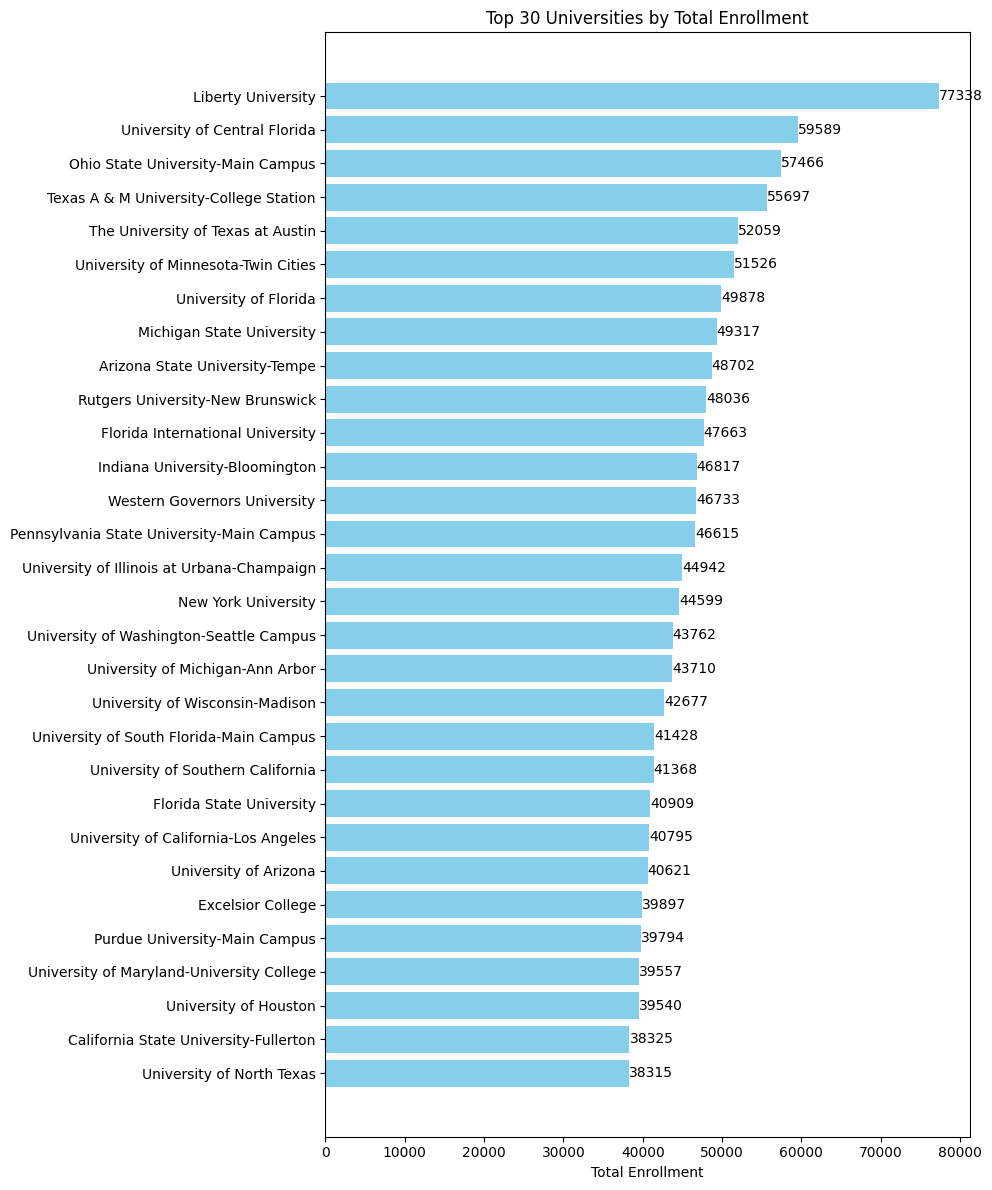

In [29]:
# Goal-1 Visualize the top 30 universities ranked by total enrollment, presenting the 
#exact enrollment count for each university 
import matplotlib.pyplot as plt

# Assuming 'df' contains the necessary columns including 'name' and 'total__enrollment'
# Fetching the top 30 universities by total enrollment
top_universities = df.nlargest(30, 'total__enrollment')

# Plotting the top 30 universities by total enrollment
plt.figure(figsize=(10, 12))
bars = plt.barh(top_universities['name'], top_universities['total__enrollment'], color='skyblue')
plt.xlabel('Total Enrollment')
plt.title('Top 30 Universities by Total Enrollment')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Adding labels for enrollment counts
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


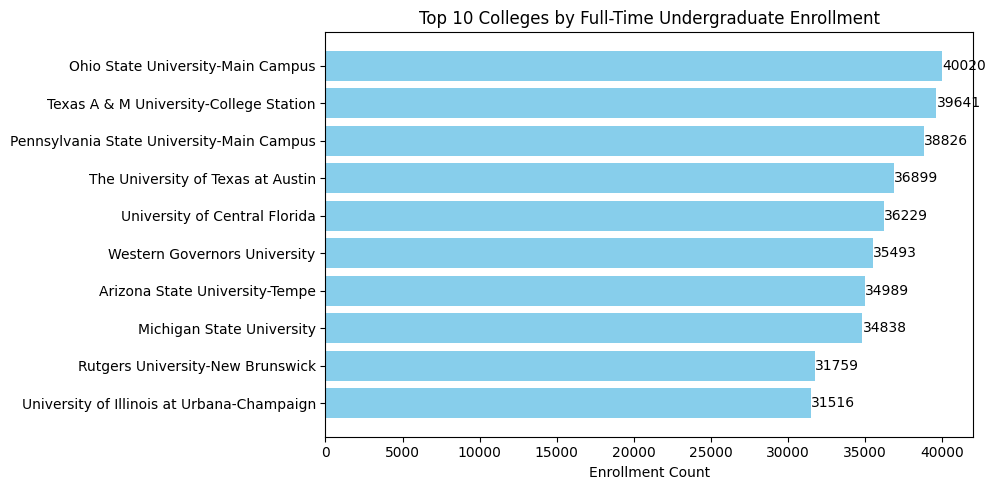

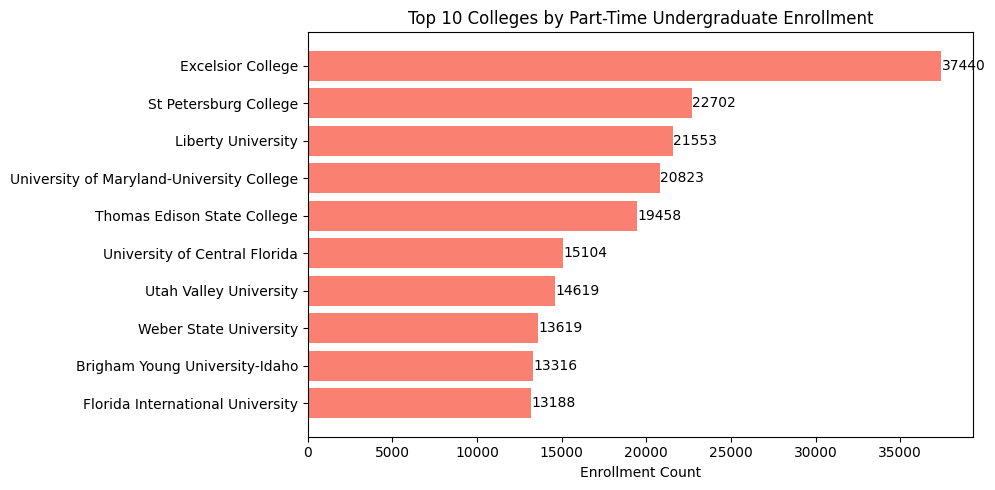

In [28]:
# Goal 2: Visualize the top 10 colleges for both full-time and part-time undergraduate enrollment "
import matplotlib.pyplot as plt

# Fetching the top 10 colleges by full-time undergraduate enrollment
top_10_full_time = df.nlargest(10, 'full-time_undergraduate_enrollment')

# Fetching the top 10 colleges by part-time undergraduate enrollment
top_10_part_time = df.nlargest(10, 'part-time_undergraduate_enrollment')

# Plotting the top 10 colleges by full-time undergraduate enrollment
plt.figure(figsize=(10, 5))
bars = plt.barh(top_10_full_time['name'], top_10_full_time['full-time_undergraduate_enrollment'], color='skyblue')
plt.xlabel('Enrollment Count')
plt.title('Top 10 Colleges by Full-Time Undergraduate Enrollment')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Adding labels for full-time enrollment counts
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Plotting the top 10 colleges by part-time undergraduate enrollment
plt.figure(figsize=(10, 5))
bars = plt.barh(top_10_part_time['name'], top_10_part_time['part-time_undergraduate_enrollment'], color='salmon')
plt.xlabel('Enrollment Count')
plt.title('Top 10 Colleges by Part-Time Undergraduate Enrollment')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Adding labels for part-time enrollment counts
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


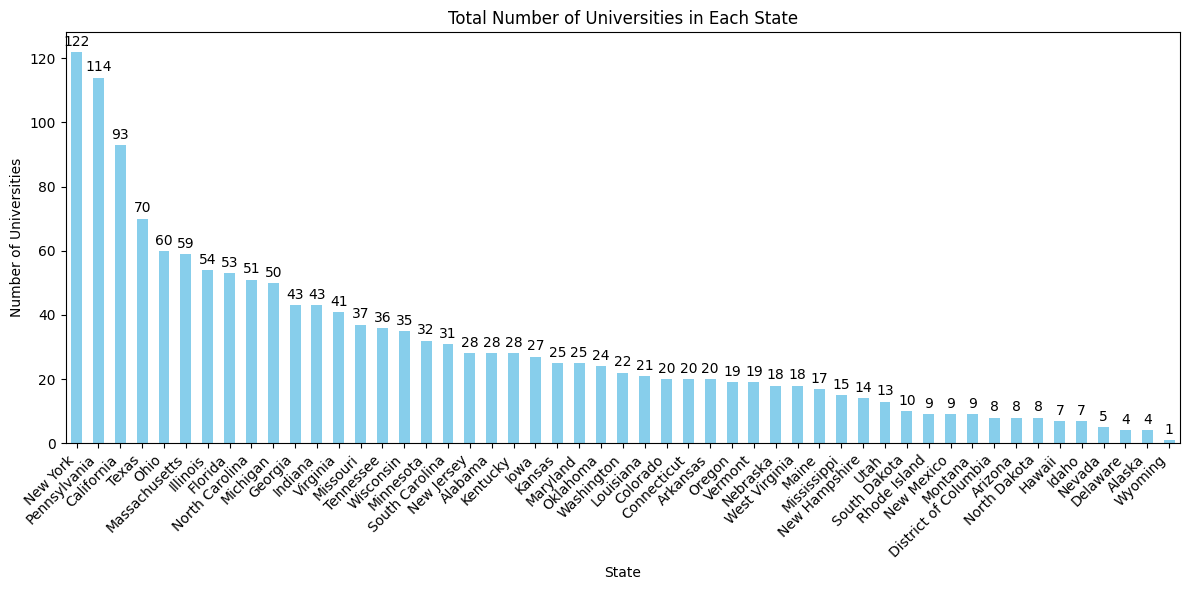

In [33]:
#Goal 3: To find the total number of universities in each state.

import matplotlib.pyplot as plt

# Assuming 'df' contains the necessary columns including 'state_abbreviation'
# Counting the number of universities per state
universities_per_state = df['state_abbreviation'].value_counts()

plt.figure(figsize=(12, 6))
plot = universities_per_state.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Universities')
plt.title('Total Number of Universities in Each State')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding labels to the bars
for i, count in enumerate(universities_per_state):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


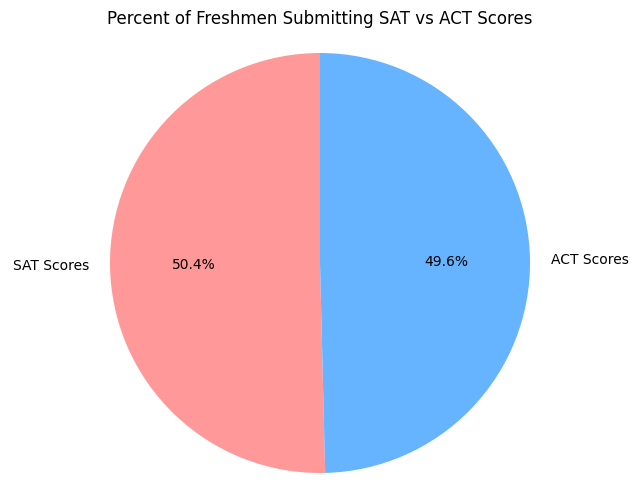

In [35]:
# Goal-4 Represent the average percentage of freshmen submitting SAT and ACT scores
import matplotlib.pyplot as plt

# Assuming 'df' contains the necessary columns

# Calculate percentages for SAT and ACT scores submission
percent_sat_scores = df['percent_of_freshmen_submitting_sat_scores'].mean()
percent_act_scores = df['percent_of_freshmen_submitting_act_scores'].mean()

# Data for the pie chart
labels = ['SAT Scores', 'ACT Scores']
sizes = [percent_sat_scores, percent_act_scores]
colors = ['#ff9999', '#66b3ff']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percent of Freshmen Submitting SAT vs ACT Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


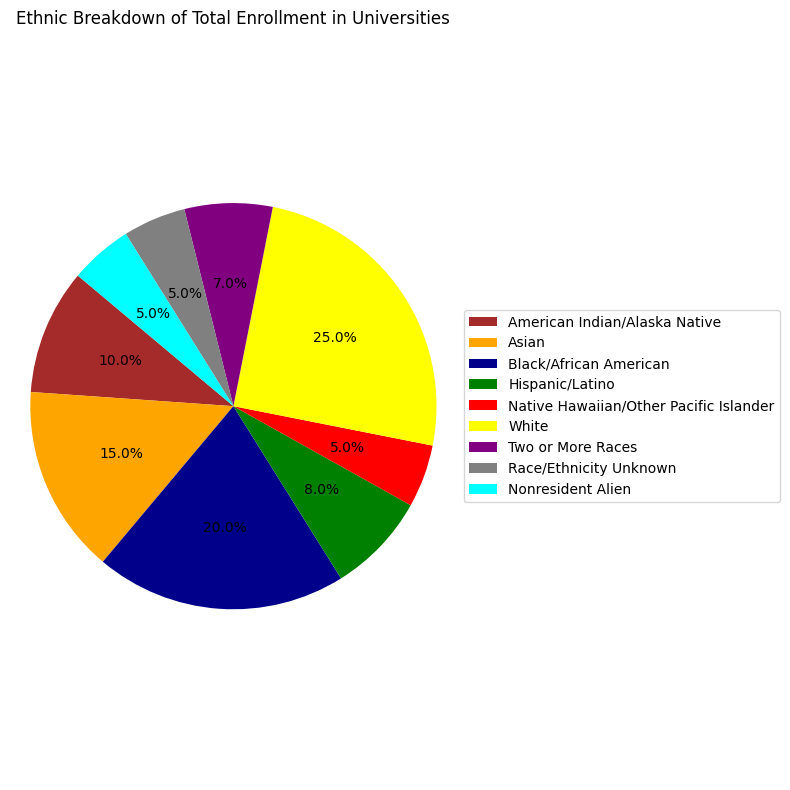

In [42]:
#Goal- 5 Visualize the distribution of various ethnicities within total university enrollments, 
#depicting the proportion of different ethnic groups across the universities
import matplotlib.pyplot as plt

# Assuming 'df' contains the data and the specified columns
ethnicities = [
    'American Indian/Alaska Native', 'Asian', 'Black/African American', 
    'Hispanic/Latino', 'Native Hawaiian/Other Pacific Islander', 'White', 
    'Two or More Races', 'Race/Ethnicity Unknown', 'Nonresident Alien'
]

# Corresponding percentages of each ethnicity (replace these values with your data)
ethnicity_percentages = [10, 15, 20, 8, 5, 25, 7, 5, 5]

# Define colors for each ethnicity (adjust or add colors as needed)
colors = ['brown', 'orange', 'darkblue', 'green', 'red', 'yellow', 'purple', 'gray', 'cyan']

# Creating a pie chart
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(ethnicity_percentages, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title('Ethnic Breakdown of Total Enrollment in Universities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create legend with color patches
plt.legend(patches, ethnicities, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
